In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#
# load data and inspect
#
df = pd.read_csv('../Datasets/austin_weather.csv')
#
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [3]:
df = df[['Date','TempAvgF']]
df

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50
...,...,...
1314,2017-07-27,89
1315,2017-07-28,91
1316,2017-07-29,92
1317,2017-07-30,93


In [4]:
df.loc[:,'Year'] = df.loc[:,'Date'].str.slice(0,4).astype(int)
df.loc[:,'Month'] = df.loc[:,'Date'].str.slice(5,7).astype(int)
df.loc[:,'Day'] = df.loc[:,'Date'].str.slice(8,10).astype(int)
df

c:\Users\Judit\Documents\Qsync\PythonGyakorlas\SupervisedLearningWorkshop\slw\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\Judit\Documents\Qsync\PythonGyakorlas\SupervisedLearningWorkshop\slw\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Date,TempAvgF,Year,Month,Day
0,2013-12-21,60,2013,12,21
1,2013-12-22,48,2013,12,22
2,2013-12-23,45,2013,12,23
3,2013-12-24,46,2013,12,24
4,2013-12-25,50,2013,12,25
...,...,...,...,...,...
1314,2017-07-27,89,2017,7,27
1315,2017-07-28,91,2017,7,28
1316,2017-07-29,92,2017,7,29
1317,2017-07-30,93,2017,7,30


In [5]:
df['MA'] = df.TempAvgF.rolling(20).mean()
df

c:\Users\Judit\Documents\Qsync\PythonGyakorlas\SupervisedLearningWorkshop\slw\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,TempAvgF,Year,Month,Day,MA
0,2013-12-21,60,2013,12,21,NaN
1,2013-12-22,48,2013,12,22,NaN
2,2013-12-23,45,2013,12,23,NaN
3,2013-12-24,46,2013,12,24,NaN
4,2013-12-25,50,2013,12,25,NaN
...,...,...,...,...,...,...
1314,2017-07-27,89,2017,7,27,88.95
1315,2017-07-28,91,2017,7,28,89.10
1316,2017-07-29,92,2017,7,29,89.25
1317,2017-07-30,93,2017,7,30,89.50


In [6]:
df = df[df.Year==2015].reset_index()
df

,index,Date,TempAvgF,Year,Month,Day,MA
0,376,2015-01-01,37,2015,1,1,52.70
1,377,2015-01-02,41,2015,1,2,51.50
2,378,2015-01-03,51,2015,1,3,50.65
3,379,2015-01-04,43,2015,1,4,49.65
4,380,2015-01-05,41,2015,1,5,48.95
...,...,...,...,...,...,...,...
360,736,2015-12-27,55,2015,12,27,61.10
361,737,2015-12-28,41,2015,12,28,60.20
362,738,2015-12-29,43,2015,12,29,59.25
363,739,2015-12-30,49,2015,12,30,58.45


In [7]:
df['Day_of_Year'] = df.index + 1
df

,index,Date,TempAvgF,Year,Month,Day,MA,Day_of_Year
0,376,2015-01-01,37,2015,1,1,52.70,1
1,377,2015-01-02,41,2015,1,2,51.50,2
2,378,2015-01-03,51,2015,1,3,50.65,3
3,379,2015-01-04,43,2015,1,4,49.65,4
4,380,2015-01-05,41,2015,1,5,48.95,5
...,...,...,...,...,...,...,...,...
360,736,2015-12-27,55,2015,12,27,61.10,361
361,737,2015-12-28,41,2015,12,28,60.20,362
362,738,2015-12-29,43,2015,12,29,59.25,363
363,739,2015-12-30,49,2015,12,30,58.45,364


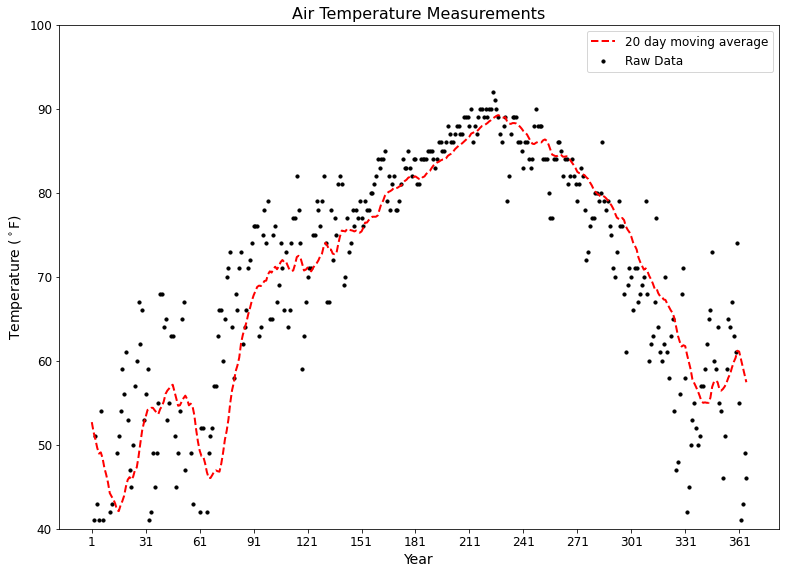

In [8]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df.Day_of_Year, df.TempAvgF, 
           label = 'Raw Data', 
           c = 'k',
           s = 10)

#
# moving average
#
ax.plot(df.Day_of_Year, df.MA, 
        c = "red",
        linestyle = '--',
        linewidth = 2,
        label = '20 day moving average')

# #
# # linear fit
# #
# ax.plot(pred_X, pred_Y, 
#         c = "blue",
#         linestyle = '-.',
#         linewidth = 4,
#         label = 'linear fit')

#
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_ylim(40, 100)

tick_days = range(df.Day_of_Year.min(), df.Day_of_Year.max(), 30)
ax.set_xticks(tick_days)

ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

In [9]:
MonthStrings = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}
df.loc[:,'sMonth'] = df.Month.map(MonthStrings)
df

,index,Date,TempAvgF,Year,Month,Day,MA,Day_of_Year,sMonth
0,376,2015-01-01,37,2015,1,1,52.70,1,Jan
1,377,2015-01-02,41,2015,1,2,51.50,2,Jan
2,378,2015-01-03,51,2015,1,3,50.65,3,Jan
3,379,2015-01-04,43,2015,1,4,49.65,4,Jan
4,380,2015-01-05,41,2015,1,5,48.95,5,Jan
...,...,...,...,...,...,...,...,...,...
360,736,2015-12-27,55,2015,12,27,61.10,361,Dec
361,737,2015-12-28,41,2015,12,28,60.20,362,Dec
362,738,2015-12-29,43,2015,12,29,59.25,363,Dec
363,739,2015-12-30,49,2015,12,30,58.45,364,Dec


In [10]:
df.groupby('Month').agg({'TempAvgF':'mean'})

,TempAvgF
Month,
1,48.935484
2,51.607143
3,60.483871
4,71.433333
5,75.419355
6,81.333333
7,85.838710
8,87.645161
9,83.566667


In [14]:
dummy_vars = pd.get_dummies(df.sMonth, drop_first=True)
dummy_vars

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
360,0,1,0,0,0,0,0,0,0,0,0
361,0,1,0,0,0,0,0,0,0,0,0
362,0,1,0,0,0,0,0,0,0,0,0
363,0,1,0,0,0,0,0,0,0,0,0


In [18]:
df_one_year = pd.concat([df, dummy_vars], axis=1)
df_one_year = df_one_year.drop('sMonth', axis = 1)
df_one_year

,index,Date,TempAvgF,Year,Month,Day,MA,Day_of_Year,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,376,2015-01-01,37,2015,1,1,52.70,1,0,0,0,1,0,0,0,0,0,0,0
1,377,2015-01-02,41,2015,1,2,51.50,2,0,0,0,1,0,0,0,0,0,0,0
2,378,2015-01-03,51,2015,1,3,50.65,3,0,0,0,1,0,0,0,0,0,0,0
3,379,2015-01-04,43,2015,1,4,49.65,4,0,0,0,1,0,0,0,0,0,0,0
4,380,2015-01-05,41,2015,1,5,48.95,5,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,736,2015-12-27,55,2015,12,27,61.10,361,0,1,0,0,0,0,0,0,0,0,0
361,737,2015-12-28,41,2015,12,28,60.20,362,0,1,0,0,0,0,0,0,0,0,0
362,738,2015-12-29,43,2015,12,29,59.25,363,0,1,0,0,0,0,0,0,0,0,0
363,739,2015-12-30,49,2015,12,30,58.45,364,0,1,0,0,0,0,0,0,0,0,0


In [21]:
df_one_year.iloc[:, -12:]

,Day_of_Year,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,0,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,0,0
3,4,0,0,0,1,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,0,1,0,0,0,0,0,0,0,0,0
361,362,0,1,0,0,0,0,0,0,0,0,0
362,363,0,1,0,0,0,0,0,0,0,0,0
363,364,0,1,0,0,0,0,0,0,0,0,0


In [22]:
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_one_year.iloc[:, -12:],
                 df_one_year.TempAvgF)
r2 = linear_model.score(df_one_year.iloc[:, -12:],
                 df_one_year.TempAvgF)
print('r squared ', r2)

r squared  0.7834805472165678


In [27]:
pred_X = df_one_year.Day_of_Year
pred_Y = linear_model.predict(df_one_year.iloc[:, -12:].values)

In [28]:
pred_X

0        1
1        2
2        3
3        4
4        5
      ... 
360    361
361    362
362    363
363    364
364    365
Name: Day_of_Year, Length: 365, dtype: int64

In [29]:
pred_Y

array([48.37758204, 48.41477549, 48.45196895, 48.4891624 , 48.52635586,
       48.56354931, 48.60074277, 48.63793623, 48.67512968, 48.71232314,
       48.74951659, 48.78671005, 48.8239035 , 48.86109696, 48.89829042,
       48.93548387, 48.97267733, 49.00987078, 49.04706424, 49.08425769,
       49.12145115, 49.1586446 , 49.19583806, 49.23303152, 49.27022497,
       49.30741843, 49.34461188, 49.38180534, 49.41899879, 49.45619225,
       49.49338571, 51.10503121, 51.14222466, 51.17941812, 51.21661157,
       51.25380503, 51.29099848, 51.32819194, 51.3653854 , 51.40257885,
       51.43977231, 51.47696576, 51.51415922, 51.55135267, 51.58854613,
       51.62573958, 51.66293304, 51.7001265 , 51.73731995, 51.77451341,
       51.81170686, 51.84890032, 51.88609377, 51.92328723, 51.96048069,
       51.99767414, 52.0348676 , 52.07206105, 52.10925451, 59.92596913,
       59.96316259, 60.00035604, 60.0375495 , 60.07474296, 60.11193641,
       60.14912987, 60.18632332, 60.22351678, 60.26071023, 60.29

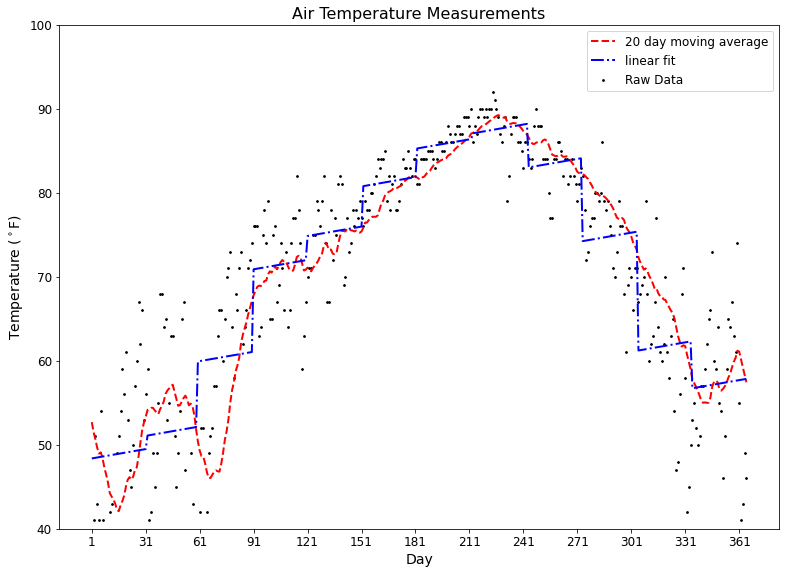

In [30]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df_one_year.Day_of_Year, df_one_year.TempAvgF, 
           label = 'Raw Data', 
           c = 'k',
           s = 3)

#
# moving average
#
ax.plot(df_one_year.Day_of_Year, df_one_year.MA, 
        c = "red",
        linestyle = '--',
        linewidth = 2,
        label = '20 day moving average')

#
# linear fit
#
ax.plot(pred_X, pred_Y, 
        c = "blue",
        linestyle = '-.',
        linewidth = 2,
        label = 'linear fit')

#
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_ylim(40, 100)

tick_days = range(df_one_year.Day_of_Year.min(), df_one_year.Day_of_Year.max(), 30)
ax.set_xticks(tick_days)

ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()